##Download content from wikipedia
First wikipedia library must be installed 

In [ ]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_stories = pd.read_csv('stories.csv', '\n')
df_stories.head()

processedData = list(df_stories["col"]) 

print(processedData)

['wasnt gas passed smell comparison rotten eggs reason memorable source smell coming mouth small room full people assumed someone released gas embarrassed fess real source needless say called mom come get left quickly could sure figured source gone longer smelled like', 'foul litter box whenever walked brothers apartment smell hit immediately entire living room filled smell urine feces lesser extent whole apartment smell emanated gigantic red litter pan sitting right beside entranceway unfortunately brothers roommate four adorable cats could never keep litter pan clean smell deadened senses made feel bit dizzy urine strong smelled like noxious mix chemicals smiled tried gag cats cute stink certainly didnt mention later knew fault helped drag belongings tried breathe mouth inhale eventually left room order keep retching still like cats vow never let cats litter pan stink terribly', 'cant smell tonight coworker fart office left left came window made sniffing gesture ask smelled yet acted

Download content from Wikipedia on
* Data Science
* Artificial intelligence
* Machine Learning
* European Central Bank
* Bank
* Financial technology
* International Monetary Fund
* Basketball
* Swimming
* Tennis

In [ ]:
import pandas as pd
wiki_lst=[]
title=[]
for story_index, data in enumerate(processedData):
    wiki_lst.append(data)
    title.append(story_index)
print("examine content")
wiki_lst

examine content


['wasnt gas passed smell comparison rotten eggs reason memorable source smell coming mouth small room full people assumed someone released gas embarrassed fess real source needless say called mom come get left quickly could sure figured source gone longer smelled like',
 'foul litter box whenever walked brothers apartment smell hit immediately entire living room filled smell urine feces lesser extent whole apartment smell emanated gigantic red litter pan sitting right beside entranceway unfortunately brothers roommate four adorable cats could never keep litter pan clean smell deadened senses made feel bit dizzy urine strong smelled like noxious mix chemicals smiled tried gag cats cute stink certainly didnt mention later knew fault helped drag belongings tried breathe mouth inhale eventually left room order keep retching still like cats vow never let cats litter pan stink terribly',
 'cant smell tonight coworker fart office left left came window made sniffing gesture ask smelled yet act

##TF-IDF example

In [ ]:
df_vectors = pd.read_csv('sentimentWithAPI.csv', ',') # change this file name §§§§
df_vectors = df_vectors.drop(['Unnamed: 0'], axis=1)
df_vectors = df_vectors.drop(['Story'], axis=1)
# df_vectors = df_vectors.drop(['disgust'], axis=1)
# df_vectors = df_vectors.drop(['polarity'], axis=1)
# df_vectors = df_vectors.drop(['subjectivity'], axis=1)
# df_vectors = df_vectors.drop(['compound'], axis=1)
# df_vectors = df_vectors.drop(['neg'], axis=1)
# df_vectors = df_vectors.drop(['pos'], axis=1)

df_vectors.head()
# df_vectors.keys()
# print(df_vectors.shape)GloVe_skipgram

,joy,sadness,surprise,fear,anger,disgust
0,0.000000,0.006450,0.000000,0.026451,0.042257,0.064066
1,0.000000,0.030660,0.182379,0.027048,0.038999,0.000000
2,0.001568,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.107202,0.032976,0.155422,0.180976,0.184285
4,0.000000,0.154392,0.033092,0.276866,0.098636,0.090113


In [ ]:
rows, cols = df_vectors.shape

print(rows)
print(cols)

counter = 0

allVectors = []

for row in range(rows):
  vector = []
  for emotion in ['joy',	'sadness',	'surprise',	'fear',	'anger', 'disgust']:
    vector.append(df_vectors[emotion][row])
  allVectors.append(vector)

439
6


In [ ]:
!pip install kneed

import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
maxNoClusters = 10

kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

# A list holds the SSE values for each k
sse = []

for k in range(1, maxNoClusters):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(allVectors)
  sse.append(kmeans.inertia_)

In [ ]:
kl = KneeLocator(range(1, maxNoClusters), sse, curve="convex", direction="decreasing")
print(kl.elbow)
noOfClusters = kl.elbow

3


In [ ]:
silhouette_coefficients = []

for k in range(2, maxNoClusters):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(allVectors)
  score = silhouette_score(allVectors, kmeans.labels_)
  silhouette_coefficients.append(score)

In [ ]:
kmeans = KMeans(
       init="random",
       n_clusters=noOfClusters,
       n_init=10,
       max_iter=300,
       random_state=42
      )

kmeans.fit(allVectors)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [ ]:
# The lowest SSE value
print(kmeans.inertia_)

# Final locations of the centroid
print(kmeans.cluster_centers_)

# The number of iterations required to converge
print(kmeans.n_iter_)


4.831496172075436
[[ 4.18820987e-01  1.23456790e-03  6.17117974e-02  1.88430040e-03
  -3.12250226e-17  3.12250226e-17]
 [ 5.39874151e-02  1.60948386e-02  3.10494947e-02  1.29588309e-02
   1.80613316e-02  1.27724189e-02]
 [ 2.51823490e-03  1.24299359e-01  4.48288794e-02  1.59795972e-01
   1.35064762e-01  1.48680398e-01]]
6


In [ ]:
labels = kmeans.labels_
print(len(kmeans.labels_))
labels

439


array([1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])

Cluster: 0
Titles


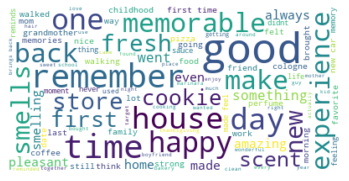

Cluster: 1
Titles


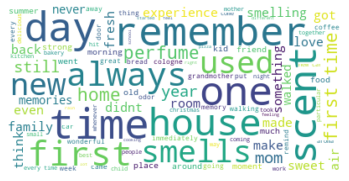

Cluster: 2
Titles


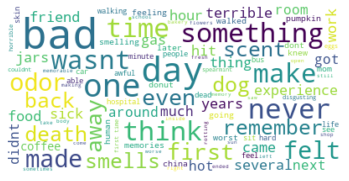

In [ ]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,3):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split() if word != "smell" and word != "smelled" and word != "really"])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    text = "sentiment_K_means_PCA" + str(k) + ".png"
    plt.savefig(text)
    plt.axis("off")
    plt.show()